In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('sample_customer_database_5000_singapore.xlsx')


In [2]:
# First look at the data
print(df.head())  # First 5 rows

  Customer ID        Full Name                Email Address  Phone Number  \
0       C0001     Norma Fisher          ysullivan@yahoo.com      82421948   
1       C0002      Levi Durham            qgrimes@gmail.com      97535139   
2       C0003   Kimberly Olsen  sean96@johnston-roberts.com      71122018   
3       C0004   Matthew Davies    nguyendarrell@hotmail.com      41352560   
4       C0005  Angela Martinez    myersmitchell@johnson.com        869141   

  Date Joined     Location  Gender Loyalty Tier  \
0  2023-08-11     Tampines  Female     Platinum   
1  2022-11-24      Geylang  Female     Platinum   
2  2023-06-19     Tampines  Female     Platinum   
3  2025-04-04   Ang Mo Kio    Male       Silver   
4  2025-01-15  Bukit Batok  Female     Platinum   

                                               Notes  
0                        Together range line beyond.  
1  Language ball floor meet usually board necessary.  
2                 Support time operation wear often.  
3         

In [3]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (5000, 9)


In [4]:
# Columns and Data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    5000 non-null   object        
 1   Full Name      5000 non-null   object        
 2   Email Address  5000 non-null   object        
 3   Phone Number   5000 non-null   int64         
 4   Date Joined    5000 non-null   datetime64[ns]
 5   Location       5000 non-null   object        
 6   Gender         5000 non-null   object        
 7   Loyalty Tier   5000 non-null   object        
 8   Notes          5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 351.7+ KB
None


In [5]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Customer ID      0
Full Name        0
Email Address    0
Phone Number     0
Date Joined      0
Location         0
Gender           0
Loyalty Tier     0
Notes            0
dtype: int64


In [6]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
# Unique values per column
print("Unique values per column:\n", df.nunique())

Unique values per column:
 Customer ID      5000
Full Name        4835
Email Address    4983
Phone Number     4998
Date Joined      1084
Location           27
Gender              2
Loyalty Tier        3
Notes            5000
dtype: int64


In [8]:
df['Location'].unique()

array(['Tampines', 'Geylang', 'Ang Mo Kio', 'Bukit Batok', 'Bedok',
       'Woodlands', 'Pasir Ris', 'Yishun', 'Bukit Timah', 'Central Area',
       'Clementi', 'Punggol', 'Queenstown', 'Bukit Panjang', 'Sembawang',
       'Marine Parade', 'Bishan', 'Sengkang', 'Toa Payoh', 'Jurong West',
       'Jurong East', 'Choa Chu Kang', 'Novena', 'Kallang', 'Hougang',
       'Bukit Merah', 'Serangoon'], dtype=object)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11540\713506157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


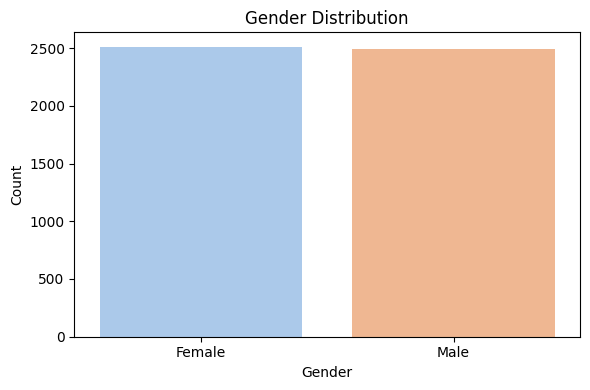

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11540\3928779869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loyalty Tier', palette='muted')


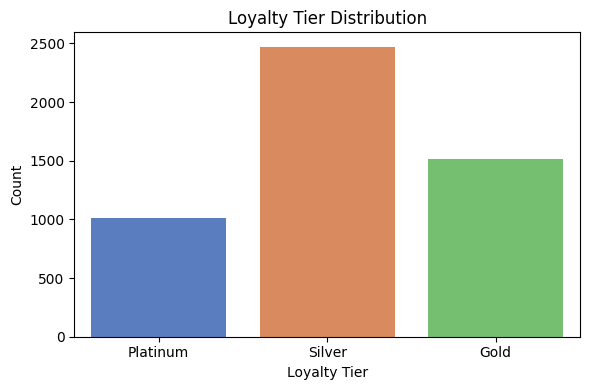

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loyalty Tier', palette='muted')
plt.title('Loyalty Tier Distribution')
plt.ylabel('Count')
plt.xlabel('Loyalty Tier')
plt.tight_layout()
plt.show()


In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Tenure', palette='cool')
plt.title('Tenure Category Distribution')
plt.ylabel('Count')
plt.xlabel('Tenure Category')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Tenure` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

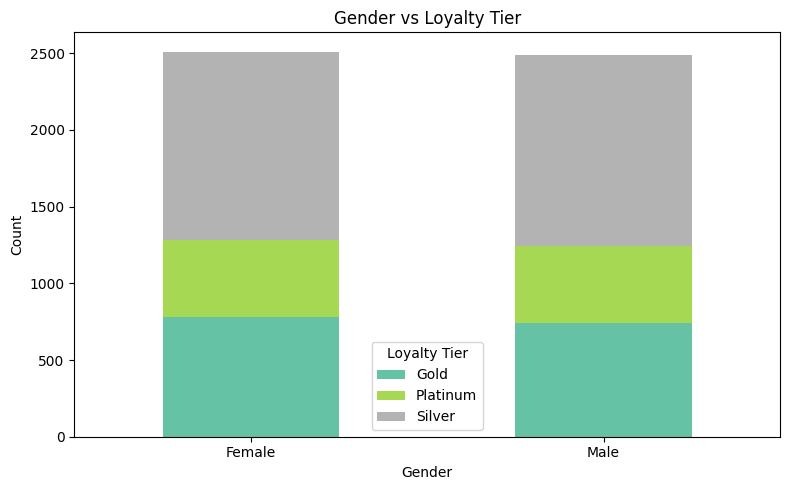

In [13]:
pd.crosstab(df['Gender'], df['Loyalty Tier']).plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Gender vs Loyalty Tier')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
zone_map = {
    # 🟦 East Region
    'Tampines': 'East',
    'Pasir Ris': 'East',
    'Bedok': 'East',
    'Geylang': 'East',
    'Marine Parade': 'East',

    # 🟩 North Region
    'Woodlands': 'North',
    'Yishun': 'North',
    'Sembawang': 'North',

    # 🟫 West Region
    'Bukit Batok': 'West',
    'Bukit Panjang': 'West',
    'Jurong West': 'West',
    'Jurong East': 'West',
    'Choa Chu Kang': 'West',
    'Clementi': 'West',

    # 🟪 North-East Region
    'Ang Mo Kio': 'North-East',
    'Hougang': 'North-East',
    'Punggol': 'North-East',
    'Sengkang': 'North-East',
    'Serangoon': 'North-East',

    # 🟥 Central Region
    'Queenstown': 'Central',
    'Bukit Timah': 'Central',
    'Central Area': 'Central',
    'Toa Payoh': 'Central',
    'Bishan': 'Central',
    'Novena': 'Central',
    'Bukit Merah': 'Central',
    'Kallang': 'Central'
}


In [15]:
# Apply zone mapping
df['Region'] = df['Location'].map(zone_map).fillna('Unknown')

In [16]:
# Count and percentage distribution of Location_Zone
zone_counts = df['Region'].value_counts()
zone_percentages = df['Region'].value_counts(normalize=True) * 100

# Combine into one DataFrame
Region_eda = pd.DataFrame({
    'Count': zone_counts,
    'Percentage (%)': zone_percentages.round(2)
})
display(Region_eda)


,Count,Percentage (%)
Region,,
Central,1502,30.04
West,1135,22.70
North-East,921,18.42
East,876,17.52
North,566,11.32


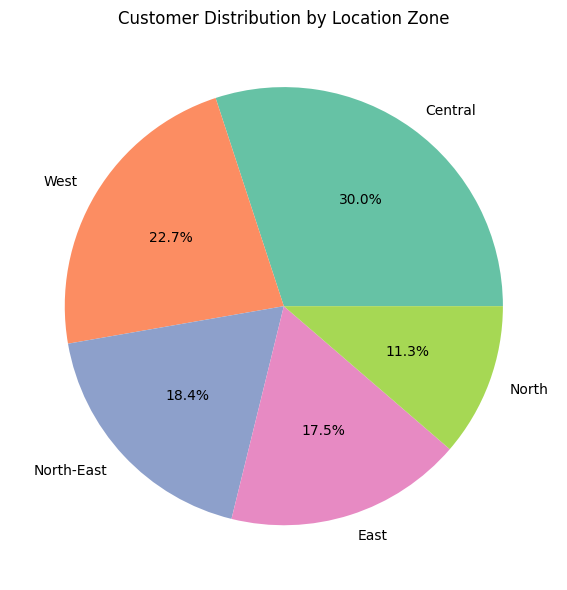

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Customer Distribution by Location Zone")
plt.tight_layout()
plt.show()


In [18]:
# Ensure 'Date_Joined' is in datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce') 

# Today's date
today = pd.to_datetime("today")

# Feature Engineering from Date_Joined
df['Days_Since_Joined'] = (today - df['Date Joined']).dt.days
df['Join_Year'] = df['Date Joined'].dt.year
df['Join_Month'] = df['Date Joined'].dt.month
df['Join_Quarter'] = df['Date Joined'].dt.quarter

# Display engineered features
df[['Date Joined', 'Days_Since_Joined', 'Join_Year', 'Join_Month', 'Join_Quarter']].head()


,Date Joined,Days_Since_Joined,Join_Year,Join_Month,Join_Quarter
0,2023-08-11,655,2023,8,3
1,2022-11-24,915,2022,11,4
2,2023-06-19,708,2023,6,2
3,2025-04-04,53,2025,4,2
4,2025-01-15,132,2025,1,1


In [19]:
# Save for reuse
categorical_cols = [
    'Location',
    'Gender',
    'Loyalty Tier',
    'Join_Year',
    'Join_Month',
    'Join_Quarter',

]

numerical_cols = [
    'Days_Since_Joined'
]


In [20]:
#to test with tenure cat 
def categorize_tenure(days):
    if days <= 90:
        return 'Very New'
    elif days <= 270:
        return 'New'
    elif days <= 540:
        return 'Mid-Term'
    elif days <= 900:
        return 'Established'
    else:
        return 'Loyal'

df['Tenure_Category'] = df['Days_Since_Joined'].apply(categorize_tenure)

# Optional: Make it an ordered category
from pandas.api.types import CategoricalDtype
tenure_order = CategoricalDtype(['Very New', 'New', 'Mid-Term', 'Established', 'Loyal'], ordered=True)
df['Tenure_Category'] = df['Tenure_Category'].astype(tenure_order)

# Preview
print(df[['Days_Since_Joined', 'Tenure_Category']].head())


   Days_Since_Joined Tenure_Category
0                655     Established
1                915           Loyal
2                708     Established
3                 53        Very New
4                132             New


In [21]:
zone_map = {
    # 🟦 East Region
    'Tampines': 'East',
    'Pasir Ris': 'East',
    'Bedok': 'East',
    'Geylang': 'East',
    'Marine Parade': 'East',

    # 🟩 North Region
    'Woodlands': 'North',
    'Yishun': 'North',
    'Sembawang': 'North',

    # 🟫 West Region
    'Bukit Batok': 'West',
    'Bukit Panjang': 'West',
    'Jurong West': 'West',
    'Jurong East': 'West',
    'Choa Chu Kang': 'West',
    'Clementi': 'West',

    # 🟪 North-East Region
    'Ang Mo Kio': 'North-East',
    'Hougang': 'North-East',
    'Punggol': 'North-East',
    'Sengkang': 'North-East',
    'Serangoon': 'North-East',

    # 🟥 Central Region
    'Queenstown': 'Central',
    'Bukit Timah': 'Central',
    'Central Area': 'Central',
    'Toa Payoh': 'Central',
    'Bishan': 'Central',
    'Novena': 'Central',
    'Bukit Merah': 'Central',
    'Kallang': 'Central'
}
# Apply zone mapping
df['Region'] = df['Location'].map(zone_map).fillna('Unknown')

In [36]:
#current at with diff oridnal score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import umap
import hdbscan
import numpy as np
import pandas as pd

# Step 0: Ordinal and Binning
df['Loyalty_Tier_Score'] = df['Loyalty Tier'].map({'Silver': 1, 'Gold': 2, 'Platinum': 3})

df['Tenure'] = pd.cut(
    df['Days_Since_Joined'],
    bins=[0, 300, 700, df['Days_Since_Joined'].max()],
    labels=['New', 'Mid-Term', 'Loyal']
)

# Step 1: One-Hot Encoding
categorical_cols = ['Location', 'Gender',  'Tenure','Join_Year', 'Join_Month', 'Join_Quarter']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(df[categorical_cols])

# Step 2: Scale numerical (loyalty score)
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[['Loyalty_Tier_Score']])

# Step 3: Combine features
combined_features = np.hstack([cat_encoded, num_scaled])

# Step 4: UMAP
embed = umap.UMAP(
    n_neighbors=80,#80,120,130
    min_dist=0.1,
    n_components=10,
    random_state=42
).fit_transform(combined_features)

# Step 5: HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=400,
    min_samples=5,
    prediction_data=True
)
df['HDBSCAN_CatNum_Label_1'] = clusterer.fit_predict(embed)

# Step 6: Evaluate
mask = df['HDBSCAN_CatNum_Label_1'] != -1
if mask.sum() > 1:
    silhouette = silhouette_score(embed[mask], df.loc[mask, 'HDBSCAN_CatNum_Label_1'])
    print("✅ Silhouette Score:", silhouette)
else:
    print("⚠️ Too much noise – Silhouette not computed")

# Step 7: Cluster count
n_clusters = len(np.unique(df['HDBSCAN_CatNum_Label_1'])) - (1 if -1 in df['HDBSCAN_CatNum_Label_1'] else 0)
print("📊 Number of clusters (excluding noise):", n_clusters)

# Optional: View sample
print(df[['HDBSCAN_CatNum_Label_1',  'Gender', 'Location', 'Loyalty Tier']].head())

from hdbscan.validity import validity_index
from scipy.spatial.distance import pdist

# Step 1: Filter out noise
mask = df['HDBSCAN_CatNum_Label_1'] != -1
labels = df.loc[mask, 'HDBSCAN_CatNum_Label_1'].values
X = embed[mask].astype(np.float64)

# Step 2: Call validity_index using feature matrix directly
dbcv_score = validity_index(X, labels, metric='euclidean')
print("📈 DBCV Score:", dbcv_score)





c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Silhouette Score: 0.93201524
📊 Number of clusters (excluding noise): 10
   HDBSCAN_CatNum_Label_1  Gender     Location Loyalty Tier
0                       3  Female     Tampines     Platinum
1                      -1  Female      Geylang     Platinum
2                       6  Female     Tampines     Platinum
3                       7    Male   Ang Mo Kio       Silver
4                       4  Female  Bukit Batok     Platinum
📈 DBCV Score: 0.8975105254171941


In [23]:
embedding = embed[mask]
embedding = embed[mask].astype(np.float64)

In [24]:
from hdbscan.validity import validity_index
from scipy.spatial.distance import pdist

# Step 1: Filter out noise
mask = df['HDBSCAN_CatNum_Label_1'] != -1
labels = df.loc[mask, 'HDBSCAN_CatNum_Label_1'].values
X = embed[mask].astype(np.float64)

# Step 2: Call validity_index using feature matrix directly
dbcv_score = validity_index(X, labels, metric='euclidean')
print("📈 DBCV Score:", dbcv_score)


📈 DBCV Score: 0.8975105254171941


In [35]:
# Step 1: Filter out noise (DO NOT overwrite original df)
df_cleaned_clusters = df[df['HDBSCAN_CatNum_Label_1'] != -1].copy()

# Step 2: Group and aggregate cluster profiles
cluster_profiles_summary = df_cleaned_clusters.groupby('HDBSCAN_CatNum_Label_1').agg({
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'Loyalty_Tier_Score': lambda x: x.value_counts(normalize=True).to_dict(),
    'Location': lambda x: x.value_counts().head(5).to_dict(),
    'Tenure': lambda x: x.value_counts(normalize=True).to_dict(),
    'Join_Year': lambda x: x.value_counts(normalize=True).to_dict(),
    'Join_Month': lambda x: x.value_counts(normalize=True).to_dict(),
    'Join_Quarter': lambda x: x.value_counts(normalize=True).to_dict(),
})

# Step 3: Display settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Step 4: View result
cluster_profiles_summary


,Gender,Loyalty_Tier_Score,Location,Tenure,Join_Year,Join_Month,Join_Quarter
HDBSCAN_CatNum_Label_1,,,,,,,
0,"{'Female': 0.5257009345794392, 'Male': 0.4742990654205608}","{1: 0.4602803738317757, 2: 0.35046728971962615, 3: 0.18925233644859812}","{'Bedok': 26, 'Punggol': 24, 'Bishan': 22, 'Bukit Merah': 21, 'Tampines': 21}","{'Loyal': 1.0, 'New': 0.0, 'Mid-Term': 0.0}",{2023: 1.0},"{1: 0.34813084112149534, 3: 0.34579439252336447, 2: 0.3060747663551402}",{1: 1.0}
1,"{'Male': 0.525934861278649, 'Female': 0.47406513872135103}","{1: 0.5126658624849216, 2: 0.28347406513872137, 3: 0.20386007237635706}","{'Bukit Panjang': 40, 'Jurong East': 40, 'Bukit Batok': 39, 'Hougang': 38, 'Queenstown': 38}","{'Mid-Term': 0.5211097708082026, 'Loyal': 0.47889022919179736, 'New': 0.0}","{2023: 0.5211097708082026, 2022: 0.47889022919179736}","{11: 0.3606755126658625, 10: 0.35826296743063935, 12: 0.2810615199034982}",{4: 1.0}
2,"{'Female': 0.5011135857461024, 'Male': 0.49888641425389757}","{1: 0.47216035634743875, 2: 0.3028953229398664, 3: 0.22494432071269488}","{'Queenstown': 29, 'Choa Chu Kang': 29, 'Bukit Panjang': 25, 'Bedok': 20, 'Bukit Merah': 20}","{'Loyal': 1.0, 'New': 0.0, 'Mid-Term': 0.0}",{2022: 1.0},"{8: 0.3518930957683742, 7: 0.33184855233853006, 9: 0.31625835189309576}",{3: 1.0}
3,"{'Female': 0.5191570881226054, 'Male': 0.48084291187739464}","{1: 0.4904214559386973, 2: 0.31417624521072796, 3: 0.19540229885057472}","{'Bukit Timah': 28, 'Geylang': 26, 'Marine Parade': 26, 'Central Area': 23, 'Sembawang': 23}","{'Mid-Term': 0.9980842911877394, 'New': 0.0019157088122605363, 'Loyal': 0.0}","{2023: 0.7758620689655172, 2024: 0.22413793103448276}","{7: 0.4827586206896552, 8: 0.28160919540229884, 9: 0.23563218390804597}",{3: 1.0}
4,"{'Male': 0.5441527446300716, 'Female': 0.45584725536992843}","{1: 0.5035799522673031, 2: 0.3126491646778043, 3: 0.18377088305489261}","{'Choa Chu Kang': 28, 'Geylang': 25, 'Queenstown': 22, 'Toa Payoh': 21, 'Kallang': 21}","{'New': 1.0, 'Mid-Term': 0.0, 'Loyal': 0.0}",{2024: 1.0},"{11: 0.36515513126491644, 10: 0.32935560859188545, 12: 0.3054892601431981}",{4: 1.0}
5,"{'Female': 0.5470085470085471, 'Male': 0.452991452991453}","{1: 0.5363247863247863, 2: 0.2841880341880342, 3: 0.1794871794871795}","{'Bukit Batok': 30, 'Queenstown': 24, 'Ang Mo Kio': 21, 'Punggol': 21, 'Serangoon': 21}","{'New': 1.0, 'Mid-Term': 0.0, 'Loyal': 0.0}",{2025: 1.0},"{3: 0.3055555555555556, 1: 0.27564102564102566, 2: 0.27564102564102566, 4: 0.14316239316239315}","{1: 0.8568376068376068, 2: 0.14316239316239315}"
6,"{'Female': 0.5342789598108747, 'Male': 0.4657210401891253}","{1: 0.4940898345153664, 2: 0.32860520094562645, 3: 0.1773049645390071}","{'Bedok': 23, 'Choa Chu Kang': 22, 'Tampines': 21, 'Bishan': 20, 'Toa Payoh': 20}","{'Mid-Term': 1.0, 'New': 0.0, 'Loyal': 0.0}","{2024: 0.9621749408983451, 2023: 0.037825059101654845}","{6: 0.3735224586288416, 5: 0.33569739952718675, 4: 0.2907801418439716}",{2: 1.0}
7,"{'Female': 0.5185185185185185, 'Male': 0.48148148148148145}","{1: 0.48148148148148145, 2: 0.3082010582010582, 3: 0.21031746031746032}","{'Sembawang': 40, 'Bukit Merah': 37, 'Serangoon': 35, 'Bukit Timah': 34, 'Bukit Panjang': 34}","{'Loyal': 1.0, 'New': 0.0, 'Mid-Term': 0.0}","{2023: 0.5396825396825397, 2022: 0.4603174603174603}","{5: 0.376984126984127, 6: 0.3439153439153439, 4: 0.2791005291005291}",{2: 1.0}


c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11540\2411320381.py:30: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


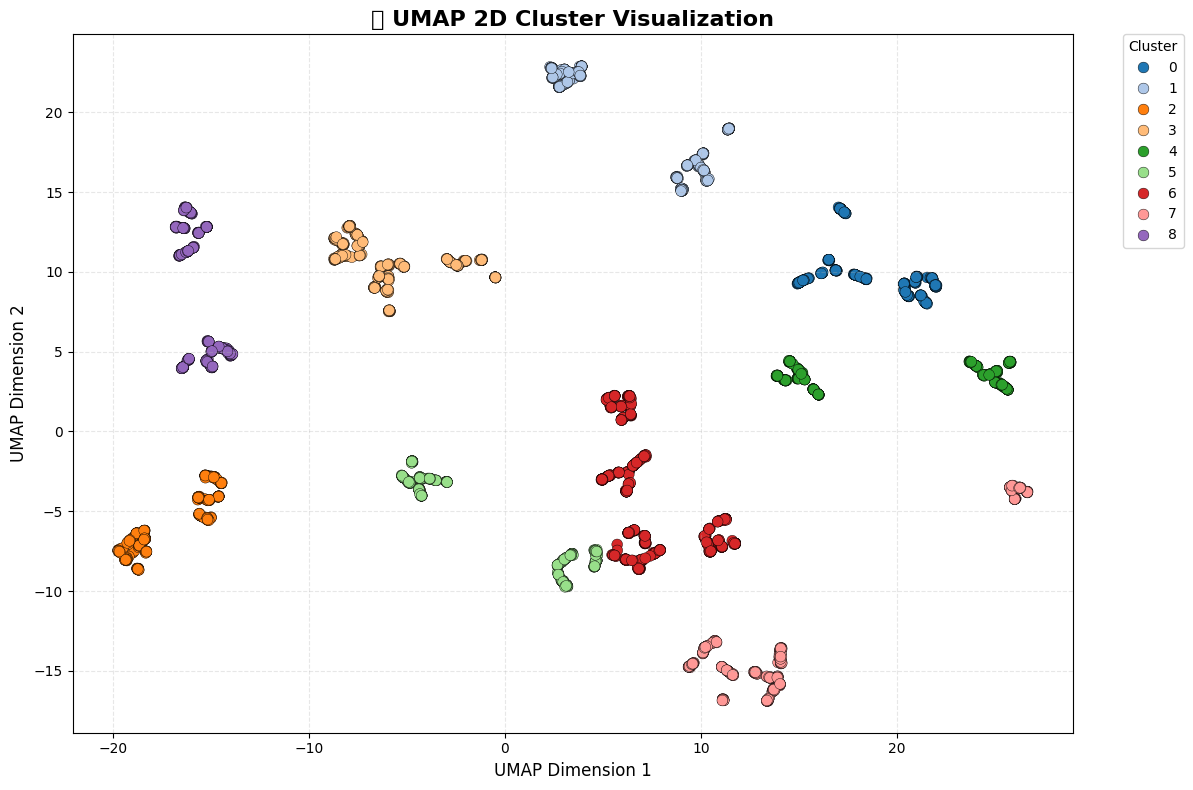

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Step: 2D UMAP Projection
umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(combined_features)
df['UMAP1'] = umap_2d[:, 0]
df['UMAP2'] = umap_2d[:, 1]

# Step: Plot Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df[df['HDBSCAN_CatNum_Label_1'] != -1],
    x='UMAP1',
    y='UMAP2',
    hue='HDBSCAN_CatNum_Label_1',
    palette='tab20',
    legend='full',
    s=60,
    edgecolor='black',
    linewidth=0.3
)

# Styling
plt.title("📌 UMAP 2D Cluster Visualization", fontsize=16, weight='bold')
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [27]:
def get_top_key(d):
    if isinstance(d, dict) and len(d) > 0:
        return max(d.items(), key=lambda x: x[1])[0]
    return 'Unknown'

cluster_profiles_summary['Dominant_Gender'] = cluster_profiles_summary['Gender'].apply(get_top_key)
cluster_profiles_summary['Dominant_Loyalty_Tier'] = cluster_profiles_summary['Loyalty_Tier_Score'].apply(
    lambda d: {1: 'Silver', 2: 'Gold', 3: 'Platinum'}.get(get_top_key(d), 'Unknown')
)

cluster_profiles_summary['Dominant_Location'] = cluster_profiles_summary['Location'].apply(get_top_key)
cluster_profiles_summary['Dominant_Tenure'] = cluster_profiles_summary['Tenure'].apply(get_top_key)

cluster_profiles_summary['Cluster_Label'] = (
    cluster_profiles_summary['Dominant_Tenure'] + ' ' +
    cluster_profiles_summary['Dominant_Gender'] + 's from ' +
    cluster_profiles_summary['Dominant_Location'] + ' (' +
    cluster_profiles_summary['Dominant_Loyalty_Tier'] + ' Tier)'
)

# View labeled clusters
cluster_profiles_summary[['Cluster_Label']]


,Cluster_Label
HDBSCAN_CatNum_Label_1,
0,Mid-Term Males from Central Area (Silver Tier)
1,New Males from Choa Chu Kang (Silver Tier)
2,Loyal Females from Queenstown (Silver Tier)
3,Mid-Term Females from Bukit Timah (Silver Tier)
4,New Females from Bukit Batok (Silver Tier)
5,Mid-Term Females from Choa Chu Kang (Silver Tier)
6,Loyal Females from Sembawang (Silver Tier)
7,Loyal Females from Bedok (Silver Tier)
8,Mid-Term Males from Hougang (Silver Tier)


c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11540\2717289666.py:16: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Lenovo\Downloads\Year 3 Major project\marketing-portal\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


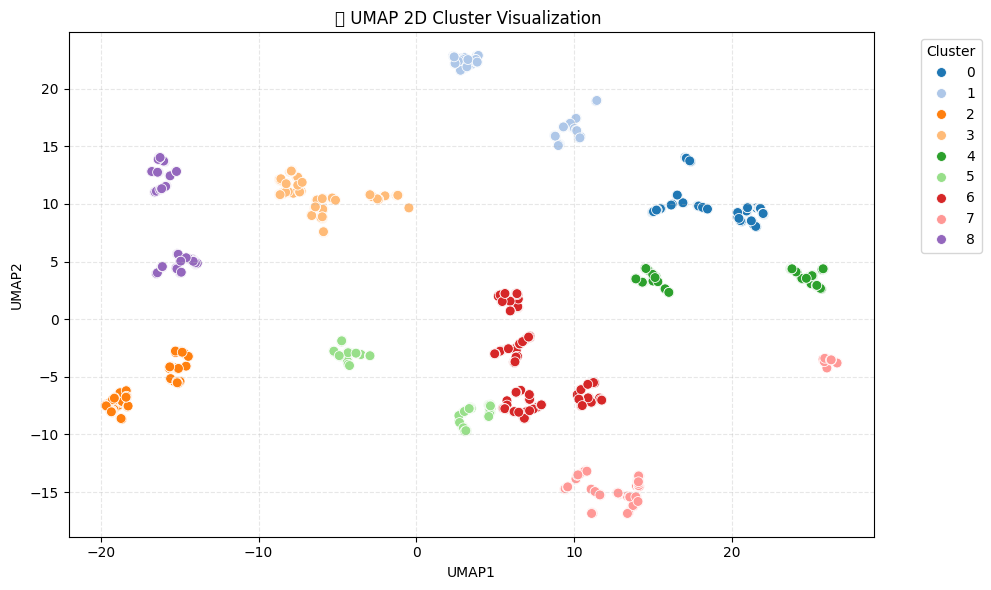

In [28]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate UMAP 2D projection using categorical + numerical combined features
umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(combined_features)
df['UMAP1'] = umap_2d[:, 0]
df['UMAP2'] = umap_2d[:, 1]

# 1. 📌 UMAP 2D Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['HDBSCAN_CatNum_Label_1'] != -1], x='UMAP1', y='UMAP2',
                hue='HDBSCAN_CatNum_Label_1', palette='tab20', legend='full', s=50)
plt.title("📌 UMAP 2D Cluster Visualization ")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [29]:
# Loop through each cluster and print sample rows
unique_clusters = df['HDBSCAN_CatNum_Label_1'].unique()
unique_clusters = [c for c in unique_clusters if c != -1]  # exclude noise if needed

for cluster in sorted(unique_clusters):
    print(f"\n🧩 Cluster {cluster} — Sample Records:")
    display(df[df['HDBSCAN_CatNum_Label_1'] == cluster].head(3)[[
        'Location', 'Gender', 'Loyalty Tier', 
    ]])



🧩 Cluster 0 — Sample Records:


,Location,Gender,Loyalty Tier
5,Tampines,Male,Silver
13,Clementi,Female,Silver
16,Bukit Panjang,Male,Silver



🧩 Cluster 1 — Sample Records:


,Location,Gender,Loyalty Tier
28,Punggol,Female,Silver
30,Central Area,Male,Silver
37,Marine Parade,Male,Platinum



🧩 Cluster 2 — Sample Records:


,Location,Gender,Loyalty Tier
7,Bedok,Female,Silver
18,Marine Parade,Male,Platinum
45,Novena,Male,Silver



🧩 Cluster 3 — Sample Records:


,Location,Gender,Loyalty Tier
0,Tampines,Female,Platinum
9,Pasir Ris,Male,Silver
10,Yishun,Male,Platinum



🧩 Cluster 4 — Sample Records:


,Location,Gender,Loyalty Tier
4,Bukit Batok,Female,Platinum
25,Central Area,Female,Silver
39,Queenstown,Male,Silver



🧩 Cluster 5 — Sample Records:


,Location,Gender,Loyalty Tier
14,Punggol,Female,Silver
22,Queenstown,Female,Platinum
27,Yishun,Male,Silver



🧩 Cluster 6 — Sample Records:


,Location,Gender,Loyalty Tier
2,Tampines,Female,Platinum
15,Queenstown,Male,Platinum
17,Sembawang,Male,Silver



🧩 Cluster 7 — Sample Records:


,Location,Gender,Loyalty Tier
3,Ang Mo Kio,Male,Silver
6,Bukit Batok,Female,Silver
8,Woodlands,Female,Silver



🧩 Cluster 8 — Sample Records:


,Location,Gender,Loyalty Tier
12,Central Area,Male,Silver
19,Bishan,Male,Silver
29,Choa Chu Kang,Male,Gold
